<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Graph-Generators" data-toc-modified-id="Graph-Generators-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Graph Generators</a></span><ul class="toc-item"><li><span><a href="#Chimeric-Graphs" data-toc-modified-id="Chimeric-Graphs-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Chimeric Graphs</a></span></li></ul></li><li><span><a href="#Reading-and-Writing-graphs" data-toc-modified-id="Reading-and-Writing-graphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reading and Writing graphs</a></span></li><li><span><a href="#Solving-systems-of-linear-equations" data-toc-modified-id="Solving-systems-of-linear-equations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solving systems of linear equations</a></span></li><li><span><a href="#Computing-Low-Stretch-Spanning-Trees" data-toc-modified-id="Computing-Low-Stretch-Spanning-Trees-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Computing Low Stretch Spanning Trees</a></span></li><li><span><a href="#Computing-Components,-and-demo-of-percolation" data-toc-modified-id="Computing-Components,-and-demo-of-percolation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Computing Components, and demo of percolation</a></span></li><li><span><a href="#Spectral-Graph-Drawing" data-toc-modified-id="Spectral-Graph-Drawing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Spectral Graph Drawing</a></span></li><li><span><a href="#Here-is-a-look-under-the-hood-of-sparse-matrices" data-toc-modified-id="Here-is-a-look-under-the-hood-of-sparse-matrices-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Here is a look under the hood of sparse matrices</a></span></li></ul></div>

This is a short demo of some of the things you can do with the Laplacians package for Julia, and with Julia itself for those who are new to it.  You need to have Laplacians installed to use this.  If you have not done so already, install it by typing `]add Laplacians`.

In [1]:
VERSION

v"1.0.0"

In [2]:
using Pkg
Pkg.activate("/Users/spielman/Lap7/")

"/Users/spielman/Lap7/Project.toml"

In [3]:
using Laplacians

In [4]:
using PyPlot
using SparseArrays
using Random
using LinearAlgebra
using Statistics
using Arpack

# Graph Generators

In [5]:
gr = grid2(4)

16×16 SparseMatrixCSC{Float64,Int64} with 48 stored entries:
  [2 ,  1]  =  1.0
  [5 ,  1]  =  1.0
  [1 ,  2]  =  1.0
  [3 ,  2]  =  1.0
  [6 ,  2]  =  1.0
  [2 ,  3]  =  1.0
  [4 ,  3]  =  1.0
  [7 ,  3]  =  1.0
  [3 ,  4]  =  1.0
  [8 ,  4]  =  1.0
  [1 ,  5]  =  1.0
  [6 ,  5]  =  1.0
  ⋮
  [11, 12]  =  1.0
  [16, 12]  =  1.0
  [9 , 13]  =  1.0
  [14, 13]  =  1.0
  [10, 14]  =  1.0
  [13, 14]  =  1.0
  [15, 14]  =  1.0
  [11, 15]  =  1.0
  [14, 15]  =  1.0
  [16, 15]  =  1.0
  [12, 16]  =  1.0
  [15, 16]  =  1.0

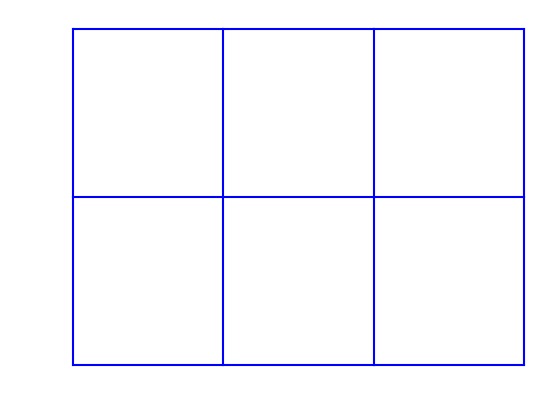

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x126ffad10>

In [6]:
gr = grid2(4,3)
(x,y) = grid2coords(4,3)
p = plot_graph(gr,x,y;dots=false)

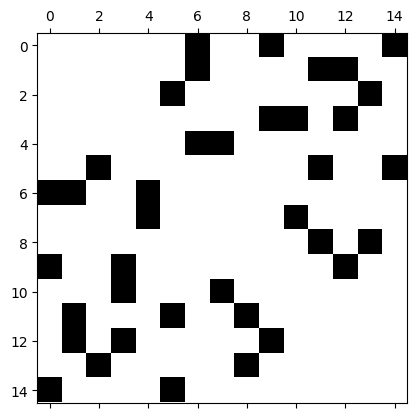

PyObject <matplotlib.image.AxesImage object at 0x12734c590>

In [7]:
gr = rand_regular(15,3)
spy(Matrix(gr))

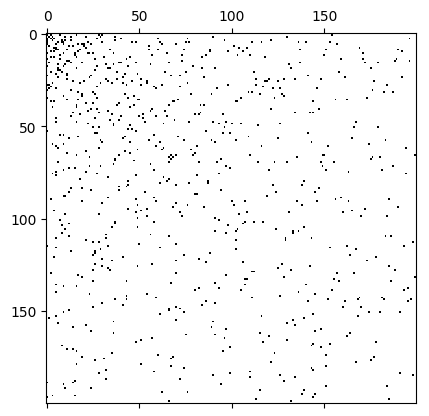

PyObject <matplotlib.image.AxesImage object at 0x12782ff10>

In [8]:
gr = grown_graph(200,2)
spy(Matrix(gr))

In [9]:
gr = Matrix(hypercube(3))

8×8 Array{Float64,2}:
 0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0
 0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0
 1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0
 0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0

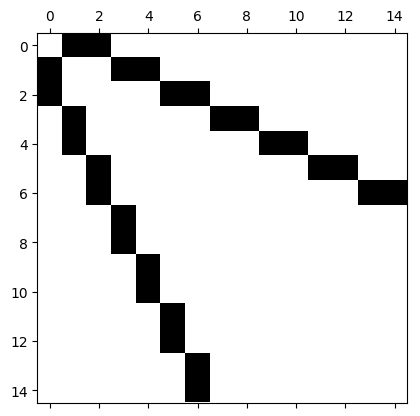

PyObject <matplotlib.image.AxesImage object at 0x127c40ad0>

In [10]:
a = complete_binary_tree(15)
spy(Matrix(a))

In [11]:
a0 = complete_binary_tree(3)
a1 = complete_binary_tree(5)
a = product_graph(a0,a1);

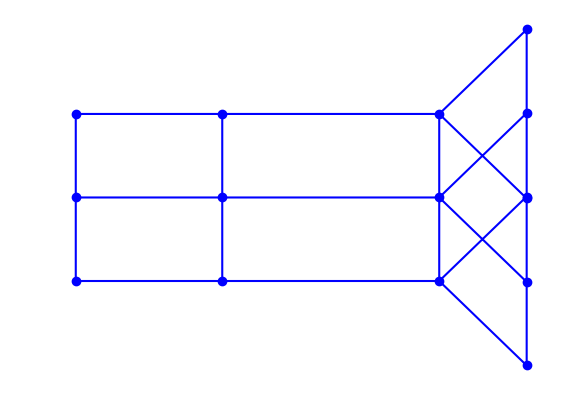

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1280a17d0>

In [12]:
spectral_drawing(a)

## Chimeric Graphs

The chimeric graphs combine together elementary graphs in strange ways.  If you want to really test your code, try it on a couple thousand of the chimeric graphs.  We also produce graphs with weights.  Here are two. 

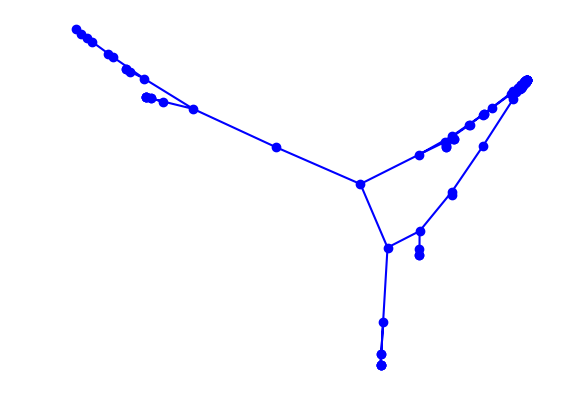

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x128160110>

In [13]:
a = chimera(100,1)
spectral_drawing(a)

In [14]:
a = wted_chimera(100)

100×100 SparseMatrixCSC{Float64,Int64} with 358 stored entries:
  [9  ,   1]  =  0.305356
  [43 ,   1]  =  0.810396
  [59 ,   1]  =  0.303577
  [77 ,   1]  =  0.255593
  [14 ,   2]  =  4.19075
  [29 ,   2]  =  3.84596
  [40 ,   2]  =  3.91678
  [27 ,   3]  =  19.5378
  [33 ,   3]  =  0.831174
  [50 ,   3]  =  0.417519
  [90 ,   3]  =  0.934766
  [28 ,   4]  =  4.90028
  ⋮
  [41 ,  96]  =  0.339475
  [61 ,  96]  =  0.465076
  [72 ,  96]  =  1.38052
  [20 ,  97]  =  0.302484
  [91 ,  97]  =  0.526588
  [33 ,  98]  =  1.57839
  [69 ,  98]  =  0.894723
  [69 ,  99]  =  0.749935
  [74 ,  99]  =  0.785528
  [91 ,  99]  =  0.54301
  [64 , 100]  =  0.371812
  [81 , 100]  =  0.582503

If you want to see how the graph was generated, turn on `verbose`.

In [15]:
a = wted_chimera(123456,4,verbose=true);

joinGraphs(0.7881821061098012*chimera(119128),chimera(4328),1242)
 joinGraphs(0.7383063939080016*chimera(119067),chimera(61),4)
  joinGraphs(0.6653943021172429*chimera(118987),chimera(80),12)
    firstn_grid2(118987)
    complete_binary_tree(80)
  joinGraphs(0.07849797488634705*chimera(11),chimera(50),6)
    grown_graph(11)
   joinGraphs(0.5243766134642553*chimera(21),chimera(29),2)
     firstn_grid2(21)
     firstn_grid2(29)
  grown_graph(4328)


# Reading and Writing graphs

We can read and write graphs as ijv lists.  These routines just want the adjacency matrix, and only store the upper-triangular portion.

In [16]:
a = wted_chimera(15,2)
writeIJV("aGraph.ijv",a)
run(`cat aGraph.ijv`)

1,2,1.9926191243844393
3,4,3.373572182808055
3,5,3.972345721087011
3,7,3.54506770516898
6,8,0.9798577711382909
7,8,1.7835803281107323
8,9,0.23174531058213932
6,10,1.1953990903387635
7,10,1.9991216473112046
2,11,3.5420989365757523
5,11,4.065628185762425
1,12,1.4639197939120832
9,12,1.3903750749518728
1,13,0.09743100434804973
4,13,2.014805839640207
9,14,2.1477631845361493
11,14,3.770787715687673
13,14,2.3187389078444096
6,15,0.7409713922415665
10,15,0.4544276980971968
12,15,0.9197433854730092


Process(`cat aGraph.ijv`, ProcessExited(0))

We can, of course, read this back in.

In [17]:
a2 = readIJV("aGraph.ijv")
a2-a

15×15 SparseMatrixCSC{Float64,Int64} with 0 stored entries

You can use routines like this to communicate with Matlab.
First, you need to tell Matlab where to find Julia.  Hopefully it is in your search path.
If not, we will try to find it.  And, tell Matlab where to find some m-files.
<pre>
>> cd('~/.julia/v0.6/Laplacians/matlab')
>> init
>> a = readIJV('aGraph.ijv')

a =

   (8,1)       1.0658
  (11,1)       1.0978
  (15,1)       0.6688
   (3,2)       4.0888
   (5,2)       4.6810
   (2,3)       4.0888
  (14,3)       4.3929
   (6,4)       0.6851
   (9,4)       1.6401
  (15,4)       0.4751
   (2,5)       4.6810
   (9,5)       3.9026
  (14,5)       4.9851
   (4,6)       0.6851
   (7,6)       2.0197
  (14,6)       3.4076
   (6,7)       2.0197
  (10,7)       1.5522
  (13,7)       1.7009
   (1,8)       1.0658
  (10,8)       1.0896
  (12,8)       0.8409
   (4,9)       1.6401
   (5,9)       3.9026
  (12,9)       1.6089
   (7,10)      1.5522
   (8,10)      1.0896
   (1,11)      1.0978
  (13,11)      1.2704
  (15,11)      0.4290
   (8,12)      0.8409
   (9,12)      1.6089
  (13,12)      0.3975
   (7,13)      1.7009
  (11,13)      1.2704
  (12,13)      0.3975
   (3,14)      4.3929
   (5,14)      4.9851
   (6,14)      3.4076
   (1,15)      0.6688
   (4,15)      0.4751
  (11,15)      0.4290
</pre>

You can also save graphs from Matlab, and read them back in to Julia.
<pre>
>> a2 = 2*a;
>> writeIJV('a2Graph.ijv',a2);
</pre>


Alternatively, you can read and write .mat files using the MATLAB.jl package.

# Solving systems of linear equations

This package contains code for solving systems of linear equations in Laplacian and SDDM matrices.  You may form the Laplacian matrix of a graph as follows.

In [18]:
a = ring_graph(5)
Matrix(lap(a))

5×5 Array{Float64,2}:
  2.0  -1.0   0.0   0.0  -1.0
 -1.0   2.0  -1.0   0.0   0.0
  0.0  -1.0   2.0  -1.0   0.0
  0.0   0.0  -1.0   2.0  -1.0
 -1.0   0.0   0.0  -1.0   2.0

Solvers for Laplacians take the adjacency matrices as input.  To use them, you first construct a function that applies the inverse.  You then apply it to a vector.

In [19]:
a = wted_chimera(123456,1)
solver = approxchol_lap(a);
b = randn(123456); b = b .- mean(b);
x = solver(b)
norm(lap(a)*x - b)/norm(b)

7.704553170864119e-7

You can adjust the accuracy, get reports about how the code performs, and much more.  To see a docstring for a function, just type a `?` followed by its name.

In [20]:
?approxchol_lap

search: approxchol_lap approxchol_sddm approxCholLap approxCholSDDM



```
solver = approxchol_lap(a); x = solver(b);
solver = approxchol_lap(a; tol::Real=1e-6, maxits=1000, maxtime=Inf, verbose=false, pcgIts=Int[], params=ApproxCholParams())
```

A heuristic by Daniel Spielman inspired by the linear system solver in https://arxiv.org/abs/1605.02353 by Rasmus Kyng and Sushant Sachdeva.  Whereas that paper eliminates vertices one at a time, this eliminates edges one at a time.  It is probably possible to analyze it. The `ApproxCholParams` let you choose one of three orderings to perform the elimination.

  * ApproxCholParams(:given) - in the order given.   This is the fastest for construction the preconditioner, but the slowest solve.
  * ApproxCholParams(:deg) - always eliminate the node of lowest degree.   This is the slowest build, but the fastest solve.
  * ApproxCholParams(:wdeg) - go by a perturbed order of wted degree.

For more info, see http://danspielman.github.io/Laplacians.jl/latest/usingSolvers/index.html


In [21]:
solver = approxchol_lap(a,verbose=true,tol=1e-10);
x = solver(b)
norm(lap(a)*x - b)/norm(b)

Using greedy degree ordering. Factorization time: 0.5422999858856201
Ratio of operator edges to original edges: 2.1363768286465072
ratio of max to min diagonal of laplacian : 1137.8545292374856
Solver build time: 0.698 seconds.
PCG stopped after: 0.485 seconds and 32 iterations with relative error 7.597745653873571e-11.


7.597731624739917e-11

The code for solving systems in SDDM matrices takes the actual matrix as input.  These should NOT be singular (Laplacians).

In [22]:
la = lap(a)
la[1,1] += 1
solver = approxchol_sddm(la)
x = solver(b,verbose=true)
norm(la*x-b)/norm(b)

PCG stopped after: 0.353 seconds and 21 iterations with relative error 9.944063250489565e-7.


9.938193486916035e-7

# Computing Low Stretch Spanning Trees

We have implemented a variant of the low-stretch spanning tree code of Alon, Karp, Peleg and West.  It produces a matrix whose entries are the stretches of all the edges in the original graph.  So that you can visualize it, we first do a small dense example.

In [23]:
a = ring_graph(5);
t = akpw(a);
Matrix(t)

5×5 Array{Float64,2}:
 0.0  1.0  0.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0

In [24]:
st = comp_stretches(t,a)
Matrix(st)

5×5 Array{Float64,2}:
 0.0  1.0  0.0  0.0  1.0
 1.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  4.0
 1.0  0.0  0.0  4.0  0.0

You can use this to compute the average stretch of the tree.

In [25]:
a = grid3(100);
@time t = akpw(a);
sum(comp_stretches(t,a))/nnz(a)

  7.491976 seconds (1.55 k allocations: 3.080 GiB, 18.30% gc time)


31.646543434343435

Note that 31.6 is very close to log(n)

In [26]:
log(length(a))

27.631021115928547

In [27]:
a = wted_chimera(1000000);
@time t = akpw(a);
sum(comp_stretches(t,a))/nnz(a)

 10.004667 seconds (10.58 k allocations: 2.036 GiB, 13.56% gc time)


6.830210014168481

# Computing Components, and demo of percolation

The following code computes a 30-by-30 grid graph, samples edges with probability 1/2, and then computes the components.

In [28]:
gr = grid2(30);
grs = subsampleEdges(gr,.5);


In [29]:
co = components(grs)

900-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  6
  7
  7
  8
  8
  8
  8
  ⋮
 66
 66
 66
 66
 66
 93
 93
 93
 95
 96
 97
 98

In [30]:
comps = vecToComps(co)

98-element Array{Array{Int64,1},1}:
 [1, 31, 61]                                                                                   
 [2, 32, 62]                                                                                   
 [3]                                                                                           
 [4, 33, 34, 35, 63, 64, 65, 92, 93, 94  …  453, 454, 483, 484, 485, 513, 514, 515, 543, 544]  
 [5]                                                                                           
 [6, 7, 36, 37]                                                                                
 [8, 9, 38, 39, 69]                                                                            
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19  …  130, 131, 132, 133, 134, 135, 136, 137, 138, 160] 
 [20]                                                                                          
 [21, 22, 50, 51, 52, 80, 81, 82]                                                              
 [23

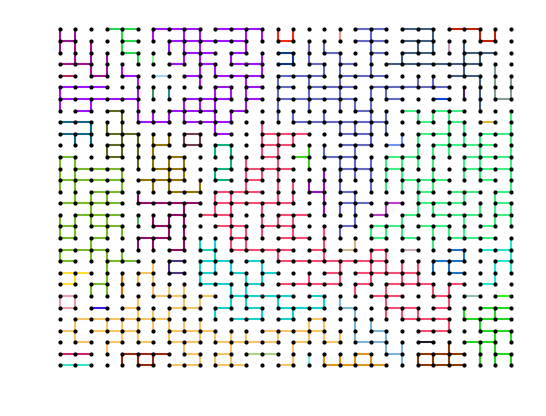

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x128420390>

In [31]:
(x,y) = grid2coords(30,30)
for i = 1:length(comps)
    ind = comps[i]
    
    plot_graph(grs[ind,ind],x[ind],y[ind],color=rand(3),dots=false,setaxis=false)
end
pm = plot(x,y,marker="o",linestyle="none",color="black",markersize=2)

# Spectral Graph Drawing

In [32]:
la = lap(grid2(3))

9×9 SparseMatrixCSC{Float64,Int64} with 33 stored entries:
  [1, 1]  =  2.0
  [2, 1]  =  -1.0
  [4, 1]  =  -1.0
  [1, 2]  =  -1.0
  [2, 2]  =  3.0
  [3, 2]  =  -1.0
  [5, 2]  =  -1.0
  [2, 3]  =  -1.0
  [3, 3]  =  2.0
  [6, 3]  =  -1.0
  [1, 4]  =  -1.0
  [4, 4]  =  3.0
  ⋮
  [6, 6]  =  3.0
  [9, 6]  =  -1.0
  [4, 7]  =  -1.0
  [7, 7]  =  2.0
  [8, 7]  =  -1.0
  [5, 8]  =  -1.0
  [7, 8]  =  -1.0
  [8, 8]  =  3.0
  [9, 8]  =  -1.0
  [6, 9]  =  -1.0
  [8, 9]  =  -1.0
  [9, 9]  =  2.0

In [33]:
E = eigs(la, nev = 3, which=:SR)
V = E[2]

9×3 Array{Float64,2}:
 0.333333   0.250412      0.520218   
 0.333333  -0.134903      0.385315   
 0.333333  -0.520218      0.250412   
 0.333333   0.385315      0.134903   
 0.333333  -5.55112e-17   1.11022e-16
 0.333333  -0.385315     -0.134903   
 0.333333   0.520218     -0.250412   
 0.333333   0.134903     -0.385315   
 0.333333  -0.250412     -0.520218   

You would think that you should use
<pre>
E = eigs(la, nev = 3, which=:SM)
</pre>
But, that gives horrible results.

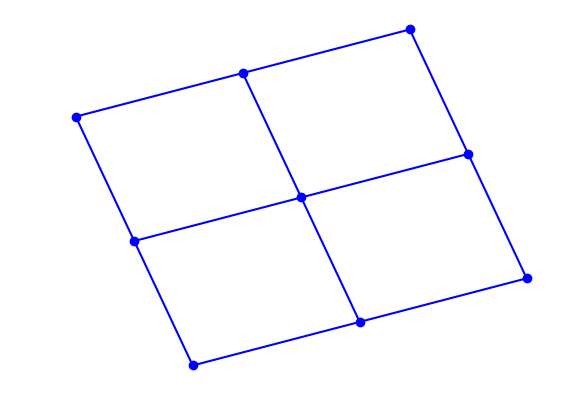

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x128d23350>

In [34]:
plot_graph(la,V[:,2],V[:,3])

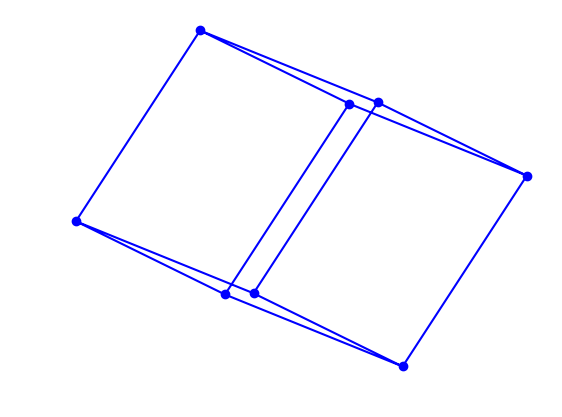

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x128f00250>

In [35]:
a = hypercube(3)
la = lap(a)
E = eigs(la, nev = 3, which=:SR)
V = E[2]
plot_graph(a,V[:,2],V[:,3])

# Here is a look under the hood of sparse matrices

In [36]:
a = grid2(5)
typeof(a)

SparseMatrixCSC{Float64,Int64}

In [37]:
fieldnames(SparseArrays.SparseMatrixCSC)

(:m, :n, :colptr, :rowval, :nzval)